In [1]:
    # Importing the basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pdb
import os
plt.style.use('ggplot')

In [2]:
train_data = pd.read_csv('churn_training.txt', sep='\t')
test_data = pd.read_csv('churn_test.txt', sep='\t')

In [3]:
# checking the training and testing data.
print(train_data.shape)
print(test_data.shape)

(2000, 21)
(1033, 21)


In [4]:
# 去除没有用处的特征
train_data.drop('area_code', axis=1, inplace=True)
test_data.drop('area_code', axis=1, inplace=True)
train_data.drop('phone_number', axis=1, inplace=True)
test_data.drop('phone_number', axis=1, inplace=True)
train_data.drop('state', axis=1, inplace=True)
test_data.drop('state', axis=1, inplace=True)

In [5]:
# checking the training and testing data.
print(train_data.shape)
print(test_data.shape)

(2000, 18)
(1033, 18)


In [6]:
from sklearn.linear_model import LogisticRegression

train_y, test_y = train_data['class'], test_data['class']
train_x, test_x = train_data.drop(columns='class', axis=1), test_data.drop(columns='class', axis=1)
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
prediction = logreg.predict(test_x)

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix #for confusion matrix

def Result(prediction, test_y):
    print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction, test_y))
    print('The f1_score of the Decision Tree is',metrics.f1_score(prediction, test_y))
    print('The precision_score of the Decision Tree is',metrics.precision_score(prediction, test_y))
    print('The recall_score of the Decision Tree is',metrics.recall_score(prediction, test_y))
    print('The roc_auc_score of the Decision Tree is',metrics.roc_auc_score(prediction, test_y))
    print(confusion_matrix(test_y, prediction))

In [9]:
Result(prediction, test_y)

The accuracy of the Decision Tree is 0.9467570183930301
The f1_score of the Decision Tree is 0.12698412698412698
The precision_score of the Decision Tree is 0.09302325581395349
The recall_score of the Decision Tree is 0.2
The roc_auc_score of the Decision Tree is 0.5807502467917078
[[974  16]
 [ 39   4]]


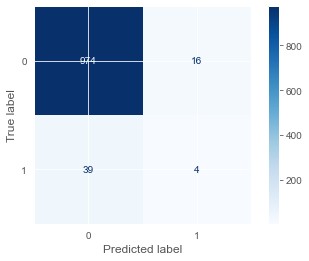

In [10]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(logreg, test_x, test_y, cmap="Blues")
plt.savefig('./Image/logistic_regression_cm.jpg', dpi=200)
plt.show()